In [1]:
from pandas import DataFrame, Series
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import sqlite3
from sqlalchemy import create_engine

## Read in formatted data

In [4]:
%%time
new = pd.read_csv('/Users/AAA218/Desktop/amifull_sg/new_all.csv',header = 0, sep=",",infer_datetime_format=True,low_memory=False)
#prob = pd.read_csv('/Users/AAA218/Desktop/ami_sg/probing.csv',header = 0, sep=",",infer_datetime_format=True,low_memory=False)
#associate = pd.read_csv('/Users/AAA218/Desktop/ami_sg/associate.csv',header = 0, sep=",",infer_datetime_format=True,low_memory=False)

CPU times: user 4.69 s, sys: 720 ms, total: 5.41 s
Wall time: 5.57 s


In [5]:
new.head()

,sgtime,mac,status_info,bldid,xcor,ycor,firstlocatedtime,lastlocatedtime,interval,hrfir,hrlas,out
0,2016-04-16 00:00:01,e8:50:8b:94:67:3b,PROBING,SDE1-02,1588.27,382.58,2016-04-15 23:56:54,2016-04-15 23:57:14,20.0,23,23,1
1,2016-04-16 02:40:01,94:b1:0a:de:9b:ca,PROBING,SDE1-02,1588.27,382.58,2016-04-16 02:38:26,2016-04-16 02:38:26,0.0,2,2,1
2,2016-04-16 02:45:01,94:b1:0a:de:9b:ca,PROBING,SDE1-02,1588.27,382.58,2016-04-16 02:38:26,2016-04-16 02:38:26,0.0,2,2,1
3,2016-04-16 07:50:01,84:55:a5:70:d1:eb,PROBING,SDE1-02,1582.69,382.87,2016-04-16 07:48:14,2016-04-16 07:48:14,0.0,7,7,1
4,2016-04-16 07:55:01,84:55:a5:70:d1:eb,PROBING,SDE1-02,1582.69,382.87,2016-04-16 07:48:14,2016-04-16 07:48:14,0.0,7,7,1


* change path to where you put database

In [2]:
#conn = sqlite3.connect('new.sqlite')
#new.status_info.replace({'PROBING','ASSOCIATED','UNKNOWN'},value= {0,1,-1},inplace=True)
disk_engine = create_engine('sqlite:////Users/AAA218/Desktop/amifull_sg/new.sqlite') 
# Initializes database with filename new.sqlite 
#for windows /D:\\script\\new.sqlite

### filter out the records with 10 mins interval between ( shut down time)

In [138]:
att = pd.read_sql_query('SELECT DISTINCT sgtime,COUNT(*),firstlocatedtime FROM wifi WHERE bldid = "SDE1-02" GROUP BY sgtime',disk_engine)
print att.shape

(3038, 3)


In [3]:
t = pd.read_sql_query('SELECT sgtime,firstlocatedtime FROM wifi WHERE bldid = "SDE3-04" GROUP BY sgtime',disk_engine) #AND sgtime > "2016-04-16 23:00:00" AND sgtime < "2016-04-17 23:00:00"  ORDER BY sgtime',disk_engine)

In [84]:
t['sgtime'] = pd.to_datetime(t.sgtime)
t['firstlocatedtime'] = pd.to_datetime(t.firstlocatedtime)
tlist = t.iloc[t.sgtime.diff()[t.sgtime.diff()>'00:10:00'].index].sgtime

In [85]:
print t.sgtime.diff().sort_values(ascending=False)[0:4]

292   00:05:04
649   00:05:01
448   00:05:01
471   00:05:01
Name: sgtime, dtype: timedelta64[ns]


In [62]:
t.iloc[3331:3334] 

,sgtime,firstlocatedtime
3331,2016-04-21 02:45:01,2016-04-21 02:36:07
3332,2016-04-21 04:10:01,2016-04-21 04:05:18
3333,2016-04-21 04:40:02,2016-04-21 04:36:05


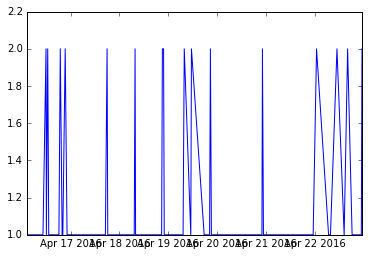

In [73]:
u_t =  t.iloc[t.sgtime.diff()[t.sgtime.diff()>'00:10:00'].index]
plt.plot(u_t.sgtime,u_t["COUNT(*)"])

In [119]:
def miss_rec(df):
    df['sgtime'] = pd.to_datetime(df.sgtime)
    #df['firstlocatedtime'] = pd.to_datetime(df.firstlocatedtime)
    alist = t.iloc[t.sgtime.diff()[t.sgtime.diff()>'00:10:00'].index].sgtime
    print alist.shape[0]
    rate = float(alist.shape[0])/float(df.shape[0])
    return rate

In [137]:
miss_rec(att)

116


0.02259446825087651

In [71]:
print t.head()

                 mac  COUNT(*)               sgtime     firstlocatedtime
0  e8:50:8b:94:67:3b         1  2016-04-16 00:00:01  2016-04-15 23:56:54
1  94:b1:0a:de:9b:ca         1  2016-04-16 02:40:01  2016-04-16 02:38:26
2  94:b1:0a:de:9b:ca         1  2016-04-16 02:45:01  2016-04-16 02:38:26
3  84:55:a5:70:d1:eb         1  2016-04-16 07:50:01  2016-04-16 07:48:14
4  84:55:a5:70:d1:eb         1  2016-04-16 07:55:01  2016-04-16 07:48:14


### select MacAddress first located 15 mins before the earliest sgtime

In [4]:
b = raw_input("please enter the building id as 'SDEX-0X' (X as number in 1 digit)")
b = str(b)
query = "SELECT mac,sgtime,statustype,firstlocatedtime,lastlocatedtime FROM wifi WHERE bldid = "+ b
print query

please enter the building id as 'SDEX-0X' (X as number in 1 digit)'SDE1-03'
SELECT mac,sgtime,statustype,firstlocatedtime,lastlocatedtime FROM wifi WHERE bldid = 'SDE1-03'


In [5]:
prob_set = pd.read_sql_query(query,disk_engine)

In [6]:
prob_set.head()

,mac,sgtime,statustype,firstlocatedtime,lastlocatedtime
0,f4:f2:6d:17:c0:c5,2016-04-16 00:00:01,UNKNOWN,2016-04-15 22:47:36,2016-04-15 22:54:26
1,48:5a:3f:67:aa:cf,2016-04-16 00:00:01,PROBING,2016-04-15 23:54:07,2016-04-15 23:54:19
2,9c:d9:17:0b:7d:aa,2016-04-16 00:00:01,PROBING,2016-04-15 23:56:28,2016-04-15 23:56:28
3,f4:8b:32:cf:8e:7b,2016-04-16 00:00:01,PROBING,2016-04-15 23:57:22,2016-04-15 23:57:22
4,5c:f7:c3:2d:66:09,2016-04-16 00:00:01,PROBING,2016-04-15 23:57:30,2016-04-15 23:57:46


In [ ]:
test = prob_set.groupby('mac').agg({"sgtime": min,"firstlocatedtime":min,"statustype": min})
differ = pd.to_datetime(test['sgtime'])-pd.to_datetime(test["firstlocatedtime"])
long_mac = differ.index[differ>"00:15:00"]
#test[test.index.isin(long_mac)].to_csv('lost.csv')

In [29]:
print "total: ",len(test.index.unique())
print "missing",len(long_mac)

total:  21882
missing 1153


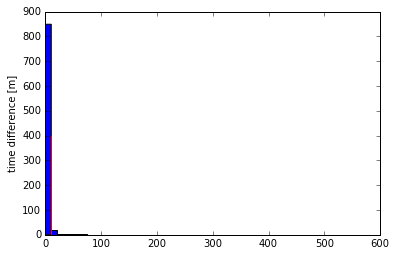

In [196]:
plt.hist(differ.astype('m8[m]').astype(np.float32),bins=50)
plt.ylabel('time difference [m]')
plt.plot((10, 10), (0, 400), 'r-')

In [23]:
test[test.index.isin(long_mac)][0:10]

,firstlocatedtime,statustype,sgtime
mac,,,
00:08:ca:3b:1c:ab,2016-04-22 10:31:49,UNKNOWN,2016-04-22 10:47:01
00:0c:e7:60:0d:60,2016-04-17 20:27:21,UNKNOWN,2016-04-17 21:10:01
00:24:d7:04:9c:b0,2016-04-18 22:42:46,PROBING,2016-04-18 22:55:01
00:24:d7:a9:d7:18,2016-04-18 11:26:50,PROBING,2016-04-18 17:01:02
00:26:c7:44:ce:42,2016-04-18 09:27:14,PROBING,2016-04-18 10:02:02
00:61:71:62:7b:45,2016-04-17 17:06:37,UNKNOWN,2016-04-17 17:30:01
00:61:71:a8:ec:8c,2016-04-18 12:45:12,UNKNOWN,2016-04-18 13:51:03
00:88:65:82:37:1c,2016-04-18 11:33:14,PROBING,2016-04-18 11:53:03
00:9a:cd:b7:d0:4e,2016-04-20 19:06:31,PROBING,2016-04-20 19:37:01


In [25]:
cs = b[1:-1] +'-lost.csv'
test[test.index.isin(long_mac)].to_csv(cs,header=['missingtime','status','earliestsgtime'])
prob_set[prob_set.mac.isin(long_mac)].sort_values(by=['mac','sgtime'])

In [179]:
prob_set[(prob_set["mac"].isin(long_mac))&(prob_set["statustype"]=="PROBING")].sort_values(by=["firstlocatedtime","mac"]).mac.describe()

count                   132
unique                   21
top       68:df:dd:55:9c:0d
freq                     31
Name: mac, dtype: object

In [177]:
print long_mac.shape

(47,)


* the missing time appears to be less than 1 devices

In [62]:
prob_set.head()

,mac,sgtime,statustype,firstlocatedtime,lastlocatedtime
0,e8:50:8b:94:67:3b,2016-04-16 00:00:01,PROBING,2016-04-15 23:56:54,2016-04-15 23:57:14
1,94:b1:0a:de:9b:ca,2016-04-16 02:40:01,PROBING,2016-04-16 02:38:26,2016-04-16 02:38:26
2,94:b1:0a:de:9b:ca,2016-04-16 02:45:01,PROBING,2016-04-16 02:38:26,2016-04-16 02:38:26
3,84:55:a5:70:d1:eb,2016-04-16 07:50:01,PROBING,2016-04-16 07:48:14,2016-04-16 07:48:14
4,84:55:a5:70:d1:eb,2016-04-16 07:55:01,PROBING,2016-04-16 07:48:14,2016-04-16 07:48:14


In [76]:
prob_set['sgtime'] = pd.to_datetime(prob_set.sgtime)

In [91]:
mac_list = prob_set[prob_set.sgtime.isin(tlist)].mac.unique()
prob_set[prob_set.mac.isin(mac_list)].sort_values(by=['mac','firstlocatedtime'])

,mac,sgtime,statustype,firstlocatedtime,lastlocatedtime
1188,00:ee:bd:77:f1:3c,2016-04-18 19:25:02,PROBING,2016-04-18 19:24:34,2016-04-18 19:24:44
1259,00:ee:bd:85:37:ce,2016-04-19 06:20:01,PROBING,2016-04-19 06:18:49,2016-04-19 06:18:49
3433,04:f7:e4:43:35:36,2016-04-20 16:53:01,PROBING,2016-04-20 16:48:30,2016-04-20 16:52:45
122,0c:1d:af:74:30:0e,2016-04-17 17:05:02,PROBING,2016-04-17 17:03:04,2016-04-17 17:04:04
123,0c:1d:af:74:30:0e,2016-04-17 17:10:02,PROBING,2016-04-17 17:03:04,2016-04-17 17:04:04
128,10:30:47:64:32:89,2016-04-17 18:15:02,PROBING,2016-04-17 18:09:02,2016-04-17 18:13:48
28,10:40:f3:b9:0a:31,2016-04-16 12:05:02,PROBING,2016-04-16 12:02:06,2016-04-16 12:04:23
29,10:40:f3:b9:0a:31,2016-04-16 12:10:01,PROBING,2016-04-16 12:02:06,2016-04-16 12:06:37
4568,10:41:7f:d8:09:4c,2016-04-22 07:40:01,UNKNOWN,2016-04-22 07:37:59,2016-04-22 07:38:37
120,10:a5:d0:42:cf:41,2016-04-17 16:25:02,PROBING,2016-04-17 16:23:15,2016-04-17 16:24:07


### check the long record to see the records' creating rules

In [87]:
misk = pd.read_sql_query('SELECT mac,sgtime,bldid,xcor,ycor,firstlocatedtime,lastlocatedtime,status FROM wifi WHERE mac = "7c:7a:91:67:87:a7"',disk_engine)
misk[-5:]

,mac,sgtime,bldid,xcor,ycor,firstlocatedtime,lastlocatedtime,statustype
5131,7c:7a:91:67:87:a7,2016-04-20 02:25:01,SDE3-04,74.81,111.11,2016-04-15 09:55:20,2016-04-20 02:24:56,UNKNOWN
5132,7c:7a:91:67:87:a7,2016-04-20 10:23:01,SDE3-04,75.79,129.66,2016-04-15 09:55:20,2016-04-20 10:22:46,UNKNOWN
5133,7c:7a:91:67:87:a7,2016-04-20 13:57:01,SDE3-04,77.68,127.61,2016-04-15 09:55:20,2016-04-20 13:56:52,PROBING
5134,7c:7a:91:67:87:a7,2016-04-20 15:18:01,SDE3-04,76.69,121.26,2016-04-15 09:55:20,2016-04-20 15:17:45,PROBING
5135,7c:7a:91:67:87:a7,2016-04-22 16:48:01,SDE3-04,67.42,127.62,2016-04-15 09:55:20,2016-04-22 16:47:48,PROBING


> Create with status change: 

>* if no device, no records; 
>* "old" device change status, only update location, last seen time, and status

In [16]:
u_mac2 = pd.read_sql_query('SELECT DISTINCT mac,COUNT(*),sgtime FROM wifi WHERE bldid = "SDE1-05" GROUP BY sgtime',disk_engine)

In [17]:
print u_mac2.head()
print u_mac2.shape

                 mac  COUNT(*)               sgtime
0  f4:f2:6d:17:7e:95         2  2016-04-16 00:00:01
1  f4:f2:6d:17:7e:95         2  2016-04-16 00:05:01
2  f4:f2:6d:17:7e:95         2  2016-04-16 00:10:01
3  f4:f2:6d:17:7e:95         2  2016-04-16 00:15:02
4  f4:f2:6d:17:7e:95         2  2016-04-16 00:20:01
(5134, 3)


In [90]:
t1= pd.to_datetime(t.sgtime)
start = t1[0]
print start
t2 = ((t1-start).map(timedelta.total_seconds))/150

2016-04-16 00:00:01


In [111]:
type(t2.unique())
miss = np.setdiff1d(np.arange(4030),t2.unique())

In [123]:
k = np.arange(miss.shape[0])

In [124]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.scatter(miss,k)
plt.show()

### Summary by hours
* create time index for summary

In [3]:
%%time
new = pd.read_sql_query('SELECT sgtime, mac, bldid,xcor,ycor,interval,movement,distance,out FROM newwifi',disk_engine)

CPU times: user 16.4 s, sys: 2.09 s, total: 18.5 s
Wall time: 19.8 s


In [26]:
len(lost)

2765

In [13]:
lost = pd.read_sql_query('SELECT mac FROM lost',disk_engine).mac.unique()

In [11]:
new.head()

,sgtime,mac,bldid,xcor,ycor,interval,movement,distance,out
0,2016-04-16 00:00:01,68:3e:34:07:7f:b4,SDE3-02,1377.65,708.20,0,first,NaN,0
1,2016-04-16 00:00:01,f4:f2:6d:17:cc:6c,SDE3-03,876.84,426.49,0,first,NaN,0
2,2016-04-16 00:00:01,f4:f2:6d:17:2a:26,SDE1-04,810.42,653.53,0,first,NaN,0
3,2016-04-16 00:00:01,f4:f2:6d:11:00:c3,SDE3-01,995.23,406.91,0,first,NaN,0
4,2016-04-16 00:00:01,f4:f2:6d:17:28:dd,SDE1-03,204.33,23.17,0,first,NaN,0


In [12]:
t = pd.to_datetime(new['sgtime'])
start = t[0]
start

Timestamp('2016-04-16 00:00:01')

### Interval & distance summary

In [4]:
int_mean = new.groupby("mac",as_index=False).agg({"interval":"mean"})
int_median =new.groupby("mac",as_index=False).agg({"interval":"median"})
#mov_all = int_mean.join(int_median,on="mac",right_index=False)
int_all = pd.merge(int_mean, int_median, on="mac", how = "left",suffixes=('_mean', '_median'))

int_all.head()

,mac,interval_mean,interval_median
0,00:00:da:6a:c6:da,1.0000,0.0
1,00:02:13:21:0f:5b,5339.8125,0.0
2,00:02:2e:b3:cd:2c,86135.0000,43156.0
3,00:02:49:de:0e:f0,0.0000,0.0
4,00:02:58:8d:93:d0,0.0000,0.0


In [5]:
len(int_all[int_all["interval_mean"]<=0])

29839

In [48]:
dis_mean = new.groupby("mac",as_index=False).agg({"distance":"mean"})
dis_median =new.groupby("mac",as_index=False).agg({"distance":"median"})
#mov_all = int_mean.join(int_median,on="mac",right_index=False)
dis_all = pd.merge(dis_mean, dis_median, on="mac", how = "left",suffixes=('_mean', '_median'))
dis_all.head()

,mac,distance_mean,distance_median
0,00:00:da:6a:c6:da,0.0,0.0
1,00:02:13:21:0f:5b,0.0,0.0
2,00:02:2e:b3:cd:2c,0.0,0.0
3,00:02:49:de:0e:f0,NaN,NaN
4,00:02:58:8d:93:d0,NaN,NaN


In [53]:
len(new[new["movement"]=="stay"].mac.unique())

49200

In [54]:
len(new[new["movement"]=="left"].mac.unique())

8364

In [8]:
len(new[-new["movement"].isin(["left","first","stay"])].mac.unique())#changed floor

22399

In [10]:
22399./56918.

0.39353104466074

In [40]:
% matplotlib inline
import matplotlib as plt
plt.style.use("ggplot")

In [49]:
mov_all.to_csv("mov mac.csv",index=False)
dis_all.to_csv("dis mac.csv",index=False)

In [ ]:
tt = []
for i, row in enumerate(new.values):
    t = int(timedelta.total_seconds(row[0]-start)/1800)#30mins
    tt.append(t)
new["t_grp"]=tt


In [6]:
%%time
t1 = ((t-start).map(timedelta.total_seconds))/1800 #0.5 hr sum 18sec

CPU times: user 18.3 s, sys: 542 ms, total: 18.9 s
Wall time: 18.8 s


In [6]:
new['t_grp'] = t1.astype(int) # make the index to be integers

In [30]:
new.head()

,sgtime,mac,status_info,bldid,xcor,ycor,firstlocatedtime,lastlocatedtime,interval,hrfir,hrlas,out
0,2016-04-16 00:00:01,e8:50:8b:94:67:3b,0,SDE1-02,1588.27,382.58,2016-04-15 23:56:54,2016-04-15 23:57:14,20.0,23,23,1
1,2016-04-16 02:40:01,94:b1:0a:de:9b:ca,0,SDE1-02,1588.27,382.58,2016-04-16 02:38:26,2016-04-16 02:38:26,0.0,2,2,1
2,2016-04-16 02:45:01,94:b1:0a:de:9b:ca,0,SDE1-02,1588.27,382.58,2016-04-16 02:38:26,2016-04-16 02:38:26,0.0,2,2,1
3,2016-04-16 07:50:01,84:55:a5:70:d1:eb,0,SDE1-02,1582.69,382.87,2016-04-16 07:48:14,2016-04-16 07:48:14,0.0,7,7,1
4,2016-04-16 07:55:01,84:55:a5:70:d1:eb,0,SDE1-02,1582.69,382.87,2016-04-16 07:48:14,2016-04-16 07:48:14,0.0,7,7,1


### summary cross time or devices
**1. summarize by time**

In [9]:
# unique mac id number, latest time spotted, std of x/y
aggreg1 ={'mac':lambda x: len(x.unique()),'sgtime':'max','interval':'median','xcor':'std','ycor':'std'}

In [5]:
sort_5min = new.groupby(['bldid','sgtime']).agg(aggreg)

In [10]:
sort_30min = new.groupby(['bldid','t_grp']).agg(aggreg1)

In [12]:
sort_30min.to_csv('/Users/AAA218/Desktop/ami_sg/p_30min.csv',na_rep = 'NA')

**2. summarize by devices**

In [7]:
%%time
aggmac = {"sgtime": lambda t: len(t.unique()),"bldid": lambda l: len(l.unique()),'interval':'median','xcor':'std','ycor':'std'}
sort_mac = new.groupby(['mac']).agg(aggmac)

CPU times: user 7.38 s, sys: 313 ms, total: 7.7 s
Wall time: 7.56 s


* Mark the devices sd within 15 meters and time median longer than 2 hrs

In [8]:
station1 = sort_mac[((sort_mac['xcor']<=55) |(sort_mac["ycor"]<=55))& (sort_mac["interval"]>=7200) ].index
len(station1)

97

In [11]:
DataFrame(station1).to_csv('/Users/AAA218/Desktop/ami_sg/stationid.csv',index=False)

In [15]:
sort_mac.loc[sort_mac.sgtime==5136,] # appears all the time

,interval,xcor,ycor,sgtime
mac,,,,
7c:7a:91:67:87:a7,429364.0,25.760004,17.179696,5136


In [6]:
sort_mac.loc[sort_mac.bldid==11,] # appears every building

,xcor,interval,bldid,ycor,sgtime
mac,,,,,
48:5a:3f:25:99:06,502.143837,4234.0,11,241.159421,2197
50:3c:c4:70:3d:42,485.667348,761.0,11,184.409145,2157
ac:bc:32:81:9a:bd,165.886742,6846.0,11,62.205051,1158
e8:50:8b:17:d5:f2,377.113022,1448.0,11,163.161793,1745


In [5]:
sort_mac.to_csv('/Users/AAA218/Desktop/ami_sg/mac_count.csv',na_rep = 'NA')

### Explore unique macAdd across time

In [144]:
%%time
sort_n = new.pivot(index='sgtime',columns='mac',values='bldid') # a df of 5136*56918
a= sort_n.count() # a Series with index as time

CPU times: user 38.2 s, sys: 5.69 s, total: 43.9 s
Wall time: 45 s


* possible ios users' ids: 6694

In [10]:
ios_1 = sort_mac.loc[sort_mac.sgtime==1,].index
len(ios_1)

6694

### Statinary identify

In [102]:
from collections import Counter 
def station(df):
    unusual = df[(df.loc[:,"interval"]>=50400)&((df.loc[:,"hrfir"]<8)|(df.loc[:,"hrfir"]>21)|(df.loc[:,"hrlas"]<8)|(df.loc[:,"hrlas"]>21))]
    un_1 = unusual['mac'].unique() # 53 ids
    print len(un_1)
    unusual = df[(df.loc[:,"interval"]>=28800)&(df.loc[:,"interval"]<50400)]
    un_2 = unusual['mac'].unique()
    tes = df[['xcor','ycor','mac']][df['mac'].isin(un_2)]
    te1 = tes.groupby("mac").std()
    sub2 = te1[(te1["xcor"]<=55)|(te1["ycor"]<=55)].index # one axis moving std within arround 15 meters
    print len(sub2)#,sub2
    final = np.append(un_1,sub2)
    return np.unique(final)

In [112]:
%%time
t1 = station(new)
mark2 = station(prob)
mark3 = station(associate)

53
96
26
67
36
66
CPU times: user 558 ms, sys: 142 ms, total: 701 ms
Wall time: 707 ms


In [113]:
print "all stationary----",len(t1)
print "PROBING stationary----",len(mark2)
print "CONNECTED stationary----",len(mark3)
print "identified stationary:  ",len(np.unique(np.append(mark2,mark3))),'total users: ',len(new['mac'].unique())

all stationary---- 128
PROBING stationary---- 80
CONNECTED stationary---- 91
identified stationary:   141 total users:  56918


### The marked stationary devices write

In [106]:
tes = new[['sgtime',"bldid",'xcor','ycor','mac']][new['mac'].isin(t1)]
te1 = tes.groupby("mac").std()
print te1.describe()

             xcor        ycor
count  128.000000  128.000000
mean   106.601999   46.659384
std    115.711762   49.171368
min      0.238012    0.141003
25%     23.865650   11.191882
50%     63.336823   32.172223
75%    147.341405   52.351189
max    554.554306  201.094631


In [115]:
tes1 = new[['sgtime',"bldid",'xcor','ycor','mac']][new['mac'].isin(t1)]
tes1.to_csv('/Users/AAA218/Desktop/ami_sg/plot.csv',index=False)

In [73]:
len(np.append(l,sub2))

90

In [70]:
new["status_info"][new['mac'].isin(sub2)].describe()

count          75604
unique             2
top       ASSOCIATED
freq           49177
Name: status_info, dtype: object

### out of boundary spots

In [17]:
out_b = pd.read_sql_query('SELECT sgtime,mac, bldid,xcor, ycor, firstlocatedtime, lastlocatedtime from newwifi WHERE out = 1',disk_engine)
out_b.groupby('bldid').count()

,sgtime,mac,xcor,ycor,firstlocatedtime,lastlocatedtime
bldid,,,,,,
SDE1-03,13103,13103,13103,13103,13103,13103
SDE3-04,16,16,16,16,16,16


In [19]:
agg1 ={"mac": lambda x: len(x.unique())}
out_summ = prob.groupby(['bldid','sgtime']).agg(agg1)
p = out_summ.unstack(level=0)
print p[0:20]
print "each building:\n",p.count()

                        mac        
bldid               SDE1-03 SDE3-04
sgtime                             
2016-04-16 00:45:01     1.0     NaN
2016-04-16 00:50:02     1.0     NaN
2016-04-16 02:40:01     1.0     NaN
2016-04-16 05:05:01     1.0     NaN
2016-04-16 05:10:01     1.0     NaN
2016-04-16 07:00:01     1.0     NaN
2016-04-16 07:10:01     1.0     NaN
2016-04-16 07:55:01     1.0     NaN
2016-04-16 08:15:02     1.0     NaN
2016-04-16 08:20:01     2.0     NaN
2016-04-16 08:25:01     1.0     NaN
2016-04-16 08:30:02     1.0     NaN
2016-04-16 08:35:01     4.0     NaN
2016-04-16 08:40:01     1.0     NaN
2016-04-16 09:10:02     1.0     NaN
2016-04-16 09:15:01     1.0     NaN
2016-04-16 09:20:01     1.0     NaN
2016-04-16 09:40:01     1.0     NaN
2016-04-16 09:50:01     1.0     NaN
2016-04-16 09:55:01     4.0     NaN
each building:
     bldid  
mac  SDE1-03    4028
     SDE3-04      16
dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A2A26D8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B6C6240>], dtype=object)

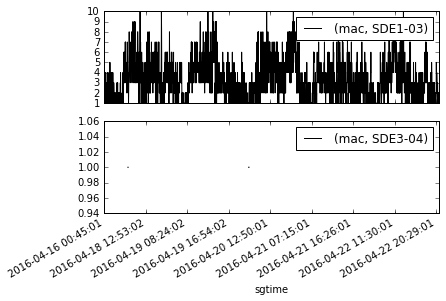

In [16]:
% matplotlib inline
import matplotlib.pyplot as plt
p.plot(kind= 'line',subplots=True,color='k')

In [5]:
associate[associate['out']==1].groupby('bldid').count()

,mac,xcor,ycor,firstlocatedtime,lastlocatedtime,interval,out
bldid,,,,,,,
SDE1-03,8041,8041,8041,8041,8041,8041,8041
SDE3-04,6,6,6,6,6,6,6


In [30]:
#print prob.sort_values(by='interval',ascending=False) 960000+sec
print "associated size: ",associate.shape

associated size:  (1584342, 11)


In [31]:
associate.sort_values(by='interval',ascending=False)[0:10] #767336+sec

,sgtime,mac,bldid,xcor,ycor,firstlocatedtime,lastlocatedtime,interval,out,hrfir,hrlas
378132,2016-04-22 23:55:01,84:3a:4b:2b:5f:14,SDE1-05,632.49,326.89,2016-04-14 02:45:50,2016-04-22 23:54:46,767336.0,1,2,23
378127,2016-04-22 23:50:01,84:3a:4b:2b:5f:14,SDE1-05,632.98,327.35,2016-04-14 02:45:50,2016-04-22 23:49:04,766994.0,1,2,23
378124,2016-04-22 23:45:01,84:3a:4b:2b:5f:14,SDE1-05,632.24,325.94,2016-04-14 02:45:50,2016-04-22 23:44:33,766723.0,1,2,23
378120,2016-04-22 23:40:01,84:3a:4b:2b:5f:14,SDE1-05,632.19,327.29,2016-04-14 02:45:50,2016-04-22 23:38:51,766381.0,1,2,23
378117,2016-04-22 23:35:01,84:3a:4b:2b:5f:14,SDE1-05,660.75,319.42,2016-04-14 02:45:50,2016-04-22 23:34:20,766110.0,1,2,23
378114,2016-04-22 23:30:01,84:3a:4b:2b:5f:14,SDE1-05,630.50,327.87,2016-04-14 02:45:50,2016-04-22 23:29:43,765833.0,1,2,23
378110,2016-04-22 23:25:01,84:3a:4b:2b:5f:14,SDE1-05,628.96,328.86,2016-04-14 02:45:50,2016-04-22 23:24:01,765491.0,1,2,23
378107,2016-04-22 23:20:01,84:3a:4b:2b:5f:14,SDE1-05,629.19,328.97,2016-04-14 02:45:50,2016-04-22 23:19:30,765220.0,1,2,23
378103,2016-04-22 23:15:01,84:3a:4b:2b:5f:14,SDE1-05,652.10,324.26,2016-04-14 02:45:50,2016-04-22 23:13:52,764882.0,1,2,23
378099,2016-04-22 23:10:01,84:3a:4b:2b:5f:14,SDE1-05,630.37,328.17,2016-04-14 02:45:50,2016-04-22 23:09:23,764613.0,1,2,23


In [65]:
print "macAdd associated no longer than 2 hrs:", len(set(associate[associate["interval"]<7200]["mac"]))
print "macAdd probing longer than 3 hrs:",len(set(prob[prob["interval"]>50400]["mac"]))

macAdd associated no longer than 2 hrs: 10734
macAdd probing longer than 3 hrs: 32


In [70]:
m = associate[associate["interval"]<800]["mac"].unique()
md = associate[associate['mac'].isin(m)]
md[md['interval']>157000]

,mac,bldid,xcor,ycor,firstlocatedtime,lastlocatedtime,interval,out
sgtime,,,,,,,,
2016-04-16 15:55:01,f4:f2:6d:17:06:32,SDE3-02,1392.52,714.94,2016-04-14T20:00:31.726+0800,2016-04-16T15:52:47.308+0800,157936.0,1
2016-04-16 16:00:02,f4:f2:6d:17:06:32,SDE3-02,1392.52,714.94,2016-04-14T20:00:31.726+0800,2016-04-16T15:52:47.308+0800,157936.0,1
2016-04-16 16:05:02,f4:f2:6d:17:06:32,SDE3-02,1392.52,714.94,2016-04-14T20:00:31.726+0800,2016-04-16T15:52:47.308+0800,157936.0,1
2016-04-16 16:10:01,f4:f2:6d:17:06:32,SDE3-02,1392.52,714.94,2016-04-14T20:00:31.726+0800,2016-04-16T15:52:47.308+0800,157936.0,1
2016-04-16 16:15:02,f4:f2:6d:17:06:32,SDE3-02,1392.52,714.94,2016-04-14T20:00:31.726+0800,2016-04-16T15:52:47.308+0800,157936.0,1
2016-04-16 16:20:02,f4:f2:6d:17:06:32,SDE3-02,1392.52,714.94,2016-04-14T20:00:31.726+0800,2016-04-16T15:52:47.308+0800,157936.0,1
2016-04-16 16:25:01,f4:f2:6d:17:06:32,SDE3-02,1392.52,714.94,2016-04-14T20:00:31.726+0800,2016-04-16T15:52:47.308+0800,157936.0,1
2016-04-16 16:30:02,f4:f2:6d:17:06:32,SDE3-02,1392.52,714.94,2016-04-14T20:00:31.726+0800,2016-04-16T15:52:47.308+0800,157936.0,1
2016-04-16 16:35:02,f4:f2:6d:17:06:32,SDE3-02,1392.52,714.94,2016-04-14T20:00:31.726+0800,2016-04-16T15:52:47.308+0800,157936.0,1


In [45]:
print len(set(associate[associate["interval"]>50400]['mac']))
prob[prob["interval"]>50400]['mac'].unique()[1:9]

39


array(['ac:d1:b8:4f:1a:15', '00:1e:65:76:39:a2', '60:d8:19:d2:81:18',
       '2c:33:7a:0d:17:a3', 'c0:4a:00:1d:65:61', 'dc:53:60:e9:cb:9a',
       '90:e7:c4:89:03:18', '84:3a:4b:2b:5f:14'], dtype=object)

In [42]:
print prob[prob["mac"]=='84:3a:4b:2b:5f:14'].shape,prob[prob["mac"]=='84:3a:4b:2b:5f:14'].head()
print prob[prob["mac"]=='84:3a:4b:2b:5f:14'][-8:]
print '----------------------ASSOCIATED------------------------'
print associate[associate["mac"]=='84:3a:4b:2b:5f:14'].shape,associate[associate["mac"]=='84:3a:4b:2b:5f:14'][0:5]
print associate[associate["mac"]=='84:3a:4b:2b:5f:14'][-8:]


(1818, 8)                                    mac    bldid    xcor    ycor  \
sgtime                                                            
2016-04-18 14:01:03  84:3a:4b:2b:5f:14  SDE1-05  643.00  322.71   
2016-04-18 14:02:02  84:3a:4b:2b:5f:14  SDE1-05  643.00  322.71   
2016-04-18 14:03:03  84:3a:4b:2b:5f:14  SDE1-05  648.31  318.40   
2016-04-18 14:04:02  84:3a:4b:2b:5f:14  SDE1-05  646.96  317.90   
2016-04-18 14:05:03  84:3a:4b:2b:5f:14  SDE1-05  646.96  317.90   

                                 firstlocatedtime  \
sgtime                                              
2016-04-18 14:01:03  2016-04-14T02:45:50.375+0800   
2016-04-18 14:02:02  2016-04-14T02:45:50.375+0800   
2016-04-18 14:03:03  2016-04-14T02:45:50.375+0800   
2016-04-18 14:04:02  2016-04-14T02:45:50.375+0800   
2016-04-18 14:05:03  2016-04-14T02:45:50.375+0800   

                                  lastlocatedtime  interval  out  
sgtime                                                            
2016-04-18 14:

### Length and Width of buildings

In [6]:
dim = {"SDE1-02":[1227.0858,1730.8369], # y,x
"SDE1-03":[275.0,394.0],
"SDE1-04":[1065.6272,1503.0952],
"SDE1-05":[1227.0858,1730.8369],
"SDE2-01":[671.634,948.0622],
"SDE2-02":[736.25146,1038.5022],
"SDE2-03":[673.7935,951.3015],
"SDE3-01" :[1214.772,1734.6945],
"SDE3-02": [2018.2332,2882.037],
"SDE3-03" :[1345.4888,1921.358],
"SDE3-04":[683.8,474.7]} 

#### Explore stationary metrics
* get the stationary records

In [59]:
a_prob = prob[prob["mac"]=='84:3a:4b:2b:5f:14']
a_assoc = associate[associate["mac"]=='84:3a:4b:2b:5f:14']
b_prob = prob[prob["mac"].isin(['00:80:92:94:22:ac','00:80:92:cc:9b:07'])]
c_prob = prob[prob["mac"]=='00:80:92:cc:9b:07']

* check x, y cor, intervals and building id status

In [63]:
print b_prob.groupby('mac').describe()

                              interval     out         xcor         ycor
mac                                                                     
00:80:92:94:22:ac count    5135.000000  5135.0  5135.000000  5135.000000
                  mean   733550.776436     1.0   265.607969   301.016401
                  std    152735.418781     0.0    18.786713     7.526200
                  min    373233.000000     1.0    75.520000   229.640000
                  25%    611539.000000     1.0   260.860000   300.940000
                  50%    751966.000000     1.0   267.660000   301.100000
                  75%    860647.000000     1.0   273.925000   301.220000
                  max    977728.000000     1.0   380.800000   411.690000
00:80:92:cc:9b:07 count    5132.000000  5132.0  5132.000000  5132.000000
                  mean   733493.209860     1.0   411.070499   300.981300
                  std    152782.025645     0.0    35.126416     4.223992
                  min    373194.000000     1.0   21

###  Mean shifts to cluster

In [1]:
#from scipy import sparse
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

### Subset data in __SDE3-03__ and estimate centroids every 30mins 

In [10]:
shifdat = new.loc[(new.bldid=="SDE3-03")& (~(new["mac"].isin(station1))),] # filter out the stationed 
shifdat = shifdat.sort_values(by=['t_grp'])
shifdat[0:9]

,sgtime,mac,status_info,bldid,xcor,ycor,firstlocatedtime,lastlocatedtime,interval,hrfir,hrlas,out,t_grp
1832156,2016-04-16 00:00:01,f0:b0:52:38:71:78,PROBING,SDE3-03,428.00,683.73,2016-04-15 23:34:21,2016-04-15 23:59:21,1500.0,23,23,1,0
1832296,2016-04-16 00:15:02,a0:39:f7:76:cf:2c,PROBING,SDE3-03,250.07,868.04,2016-04-15 20:24:19,2016-04-16 00:14:43,13824.0,20,0,1,0
1832297,2016-04-16 00:15:02,50:cc:f8:e8:2f:52,PROBING,SDE3-03,544.16,655.71,2016-04-16 00:09:53,2016-04-16 00:10:11,18.0,0,0,1,0
1832298,2016-04-16 00:15:02,f4:f2:6d:17:06:c2,ASSOCIATED,SDE3-03,686.34,882.41,2016-04-15 16:28:36,2016-04-16 00:00:31,27115.0,16,0,1,0
1832299,2016-04-16 00:15:02,34:23:87:83:33:3d,ASSOCIATED,SDE3-03,1163.62,465.16,2016-04-16 00:11:40,2016-04-16 00:14:35,175.0,0,0,1,0
1832300,2016-04-16 00:15:02,e0:b5:2d:07:e3:ee,ASSOCIATED,SDE3-03,410.21,1032.29,2016-04-16 00:12:32,2016-04-16 00:12:32,0.0,0,0,1,0
1832301,2016-04-16 00:15:02,6c:71:d9:08:c9:03,ASSOCIATED,SDE3-03,649.67,380.06,2016-04-15 18:25:20,2016-04-16 00:14:23,20943.0,18,0,1,0
1832302,2016-04-16 00:15:02,18:af:61:f1:f0:40,ASSOCIATED,SDE3-03,613.41,387.58,2016-04-15 23:53:29,2016-04-16 00:12:32,1143.0,23,0,1,0
1832303,2016-04-16 00:15:02,f4:f2:6d:17:06:32,ASSOCIATED,SDE3-03,267.43,862.14,2016-04-14 20:00:31,2016-04-15 23:06:43,97572.0,20,23,1,0


In [11]:
def grp_cluster(s):
    for i in list(s.t_grp.unique()):
        test1 = s[s["t_grp"]==i]
        shif = zip(test1['xcor'] ,test1['ycor'] )
        shif1 = np.array(shif)
        #print len(shif1)
        if (int(len(shif1)/10)>=10): 
            samp = int(len(shif1)/10)
        else: 
            samp = len(shif1)
        bw1 = estimate_bandwidth(shif1, quantile=0.2, n_samples=samp)
        ms1 = MeanShift(bandwidth=bw1, bin_seeding=True)
        ms1.fit(shif1)
        cluster_ctrs = ms1.cluster_centers_
        mat = pd.DataFrame(dict(t=i,x=cluster_ctrs[:,0],y=cluster_ctrs[:,1]))
        #print i
        if (i == 0):
            k = mat
        else: 
            k = k.append(mat, ignore_index=True)## need to modify the m
    return k

#%%time
#tes1 = shifdat[shifdat['t_grp'].isin([0,1,3,4,5])]
#tes2 = grp_cluster(tes1)

In [45]:
%%time
SDE3_03 = grp_cluster(shifdat)

CPU times: user 13.5 s, sys: 79.9 ms, total: 13.6 s
Wall time: 13.7 s


In [48]:
print SDE3_03.head()
print SDE3_03.tail()

   t            x           y
0  0  1038.303696  308.840000
1  0   650.111905  368.475476
2  0  1176.867568  457.475676
3  0   678.317826  930.367391
4  0   415.977778  330.780556
        t            x           y
2851  335   880.255789  599.527895
2852  335   714.520625  781.461875
2853  335   448.532000  982.502000
2854  335   508.641667  606.581667
2855  335  1497.445000  481.750000


### combining the 30min centroids in plot

(2856, 2) ---dims--- 2
(1921, 1345)


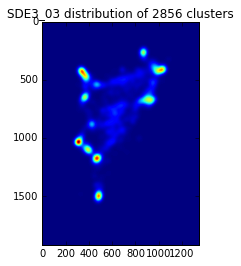

In [64]:
%matplotlib inline
#for plotting
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
data = np.array( zip(SDE3_03['x'],SDE3_03['y']) )    ## create random dataset
print data.shape,"---dims--- /n",data.ndim
img = np.zeros((1921,1345))                ## blank image
for i in xrange(data.shape[0]):          ## draw pixels
    img[int(data[i,0]), int(data[i,1])] += 1
img = ndi.gaussian_filter(img, (20,20))
print img.shape
fig,ax = plt.subplots()
plt.title('SDE3_03 distribution of %d clusters'% data.shape[0])
ax.imshow(img)
plt.show()

### Test on t_grp ==0 and see the clusters

In [19]:
test = zip(shifdat[shifdat['t_grp']==0]['xcor'],shifdat[shifdat['t_grp']==0]["ycor"])
test = np.array(test)
print test[0,1]

683.73


In [13]:
bandwidth = estimate_bandwidth(test, quantile=0.2, n_samples=20)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(test)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

In [14]:
print("centers", cluster_centers)
print("number of estimated clusters : %d" % n_clusters_)

('centers', array([[ 1038.30369565,   308.84      ],
       [  650.11190476,   368.47547619],
       [ 1176.86756757,   457.47567568],
       [  678.31782609,   930.3673913 ],
       [  415.97777778,   330.78055556],
       [  258.70916667,   865.10416667],
       [  623.88666667,   651.59333333],
       [  810.03833333,   671.29833333],
       [  936.074     ,   420.538     ],
       [  409.38      ,  1032.32333333],
       [  507.94      ,   940.33      ]]))
number of estimated clusters : 11


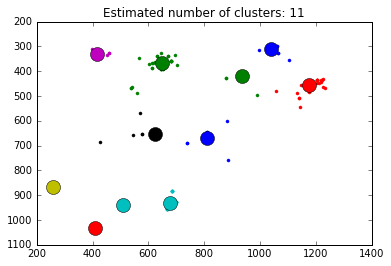

In [21]:
%matplotlib inline
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
plt.gca().invert_yaxis()
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(test[my_members, 0], test[my_members, 1], col + '.') #plot each points in one center (x,y)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Device number prediction

#### Featuring Steps
1. select lost mac id and fill the interval col with np.NaN
2. group and count mac by every 20 mins(make t_grp) and bldid
    * unique mac Address len
    * median of interval
    * dummy status sum


** This part is merged into _treat train.py_**
   

In [3]:
%%time
#connect to the DB and select all 
All =  pd.read_sql_query('SELECT mac, bldid, sgtime, firstlocatedtime,interval,statustype FROM wifi',disk_engine)
lost = pd.read_sql_query('SELECT mac FROM lost',disk_engine).mac.unique()

CPU times: user 12.6 s, sys: 1.76 s, total: 14.3 s
Wall time: 15.2 s


In [137]:
All["sgtime"] = pd.to_datetime(All['sgtime'])
start = All.iloc[0,2]

In [100]:
t_grp = (All["sgtime"]-start).map(timedelta.total_seconds)/1200.
All["t_grp"] = t_grp.astype(int)

In [150]:
%%time
interv = []
t_grp = []
for i,row in enumerate(All.values):
    #if i <=5:
    t = int(timedelta.total_seconds(All.sgtime[i]-start)/1200)
        #print t
    #else: break
    if All.mac[i] in lost:
        temp = np.nan
    else:
        temp = All.interval[i]
    interv.append(temp)
    t_grp.append(t)

CPU times: user 8min 37s, sys: 8.26 s, total: 8min 45s
Wall time: 8min 51s


In [153]:
print len(t_grp),"\n",len(interv)

2650553 
2650553


### make dummy for status

In [154]:
print All["statustype"].value_counts()

UNKNOWN       1584342
PROBING       1066168
ASSOCIATED         43
Name: statustype, dtype: int64


In [183]:
print All.shape

(5, 11)


In [158]:
All["interv"] = interv
All["t_grp"] = t
sta = pd.get_dummies(All['statustype'])
All = pd.concat([All,sta],axis=1)

                 mac    bldid              sgtime     firstlocatedtime  \
0  e8:50:8b:94:67:3b  SDE1-02 2016-04-16 00:00:01  2016-04-15 23:56:54   
1  94:b1:0a:de:9b:ca  SDE1-02 2016-04-16 02:40:01  2016-04-16 02:38:26   
2  94:b1:0a:de:9b:ca  SDE1-02 2016-04-16 02:45:01  2016-04-16 02:38:26   
3  84:55:a5:70:d1:eb  SDE1-02 2016-04-16 07:50:01  2016-04-16 07:48:14   
4  84:55:a5:70:d1:eb  SDE1-02 2016-04-16 07:55:01  2016-04-16 07:48:14   

   interval statustype  interv  t_grp  ASSOCIATED  PROBING  UNKNOWN  
0        20    PROBING    20.0    503         0.0      1.0      0.0  
1         0    PROBING     0.0    503         0.0      1.0      0.0  
2         0    PROBING     0.0    503         0.0      1.0      0.0  
3         0    PROBING     0.0    503         0.0      1.0      0.0  
4         0    PROBING     0.0    503         0.0      1.0      0.0  


In [181]:
All.shape

(5, 11)

### Aggregation

In [180]:
aggre = {"mac": lambda x: len(x.unique()),"interv":'median' ,"PROBING": 'sum',"ASSOCIATED": 'sum',"UNKNOWN": 'sum' }
All_ans = All.groupby(["bldid","sgtime"]).agg(aggre)
All_ans.shape

(5, 5)

In [162]:
All_ans.to_csv('all_agg.csv',index= True)

In [4]:
pre_tr = pd.read_csv('/Users/AAA218/Desktop/ami_sg/all_agg.csv',header = 0, sep=",",infer_datetime_format=True,low_memory=False)

In [5]:
pre_tr.shape

(54348, 7)

In [6]:
pre_tr.columns

Index([u'bldid', u'sgtime', u'PROBING', u'UNKNOWN', u'mac', u'ASSOCIATED',
       u'interv'],
      dtype='object')

In [7]:
print pre_tr['ASSOCIATED'].value_counts()

0.0    54305
1.0       43
Name: ASSOCIATED, dtype: int64


In [10]:
print pre_tr['UNKNOWN'].sum()

1584342.0


In [190]:
hr = []
mins = []
weeks = []
for i, row in enumerate(pre_tr.values):
    #if i >5 : break
    tt = datetime.strptime(pre_tr.sgtime[i], "%Y-%m-%d %H:%M:%S")
    h = tt.hour
    m = tt.minute
    wk = tt.strftime("%w") #0-6
    #print "hour:%s, minute: %s, day: %s " %(h ,m ,wk)
    hr.append(h)
    mins.append(m)
    weeks.append(wk)
com = DataFrame({"hr":hr,"mins":mins,"wks":weeks})
tt = pd.concat([pre_tr,com],axis=1)
tt.drop("sgtime",axis = 1, inplace= True)
tt

,bldid,PROBING,UNKNOWN,mac,ASSOCIATED,interv,hr,mins,wks
0,SDE1-02,1.0,0.0,1,0.0,20.0,0,0,6
1,SDE1-02,1.0,0.0,1,0.0,0.0,2,40,6
2,SDE1-02,1.0,0.0,1,0.0,0.0,2,45,6
3,SDE1-02,1.0,0.0,1,0.0,0.0,7,50,6
4,SDE1-02,1.0,0.0,1,0.0,0.0,7,55,6


In [131]:
tes_sta = pd.get_dummies(test['statustype'])
test = pd.concat([test,tes_sta],axis=1)
print test.head()

                 mac    bldid              sgtime     firstlocatedtime  \
0  e8:50:8b:94:67:3b  SDE1-02 2016-04-16 00:00:01  2016-04-15 23:56:54   
1  94:b1:0a:de:9b:ca  SDE1-02 2016-04-16 02:40:01  2016-04-16 02:38:26   
2  94:b1:0a:de:9b:ca  SDE1-02 2016-04-16 02:45:01  2016-04-16 02:38:26   
3  84:55:a5:70:d1:eb  SDE1-02 2016-04-16 07:50:01  2016-04-16 07:48:14   
4  84:55:a5:70:d1:eb  SDE1-02 2016-04-16 07:55:01  2016-04-16 07:48:14   

   interval statustype  t_grp  t_test  interv  PROBING  UNKNOWN  
0        20    PROBING      0       0    20.0      1.0      0.0  
1         0    PROBING      8       8     0.0      1.0      0.0  
2         0    PROBING      8       8     0.0      1.0      0.0  
3         0    PROBING     23      23     0.0      1.0      0.0  
4         0    PROBING     23      23     0.0      1.0      0.0  


In [133]:
#test = All[0:100].copy()
aggre = {"mac": lambda x: len(x.unique()),"interv":'median' ,"PROBING": 'sum',"UNKNOWN": 'sum' }
tes_ans = test.groupby(["bldid","sgtime"]).agg(aggre)
tes_ans.head()
#test.statustype.describe()

PROBING  UNKNOWN  mac  interv
bldid   sgtime                                            
SDE1-02 2016-04-16 00:00:01      1.0      0.0    1    20.0
        2016-04-16 02:40:01      1.0      0.0    1     0.0
        2016-04-16 02:45:01      1.0      0.0    1     0.0
        2016-04-16 07:50:01      1.0      0.0    1     0.0
        2016-04-16 07:55:01      1.0      0.0    1     0.0

In [ ]:
def estimateCovariance(df):
 """Compute the covariance matrix for a given dataframe.

    Note:
        The multi-dimensional covariance array should be calculated using outer products.  Don't
        forget to normalize the data by first subtracting the mean.

    Args:
        df:  A Spark dataframe with a column named 'features', which (column) consists of DenseVectors.

    Returns:
        np.ndarray: A multi-dimensional array where the number of rows and columns both equal the
            length of the arrays in the input dataframe.
 """
    m = df.select(df['features']).map(lambda x: x[0]).mean()
    dfZeroMean = df.select(df['features']).map(lambda x:   x[0]).map(lambda x: x-m)  # subtract the mean

    return dfZeroMean.map(lambda x: np.outer(x,x)).sum()/df.count()
from numpy.linalg import eigh

In [ ]:
def pca(df, k=2):
    """Computes the top `k` principal components, corresponding scores, and all eigenvalues.

    Note:
        All eigenvalues should be returned in sorted order (largest to smallest). `eigh` returns
        each eigenvectors as a column.  This function should also return eigenvectors as columns.

    Args:
        df: A Spark dataframe with a 'features' column, which (column) consists of DenseVectors.
        k (int): The number of principal components to return.

    Returns:
        tuple of (np.ndarray, RDD of np.ndarray, np.ndarray): A tuple of (eigenvectors, `RDD` of
        scores, eigenvalues).  Eigenvectors is a multi-dimensional array where the number of
        rows equals the length of the arrays in the input `RDD` and the number of columns equals
        `k`.  The `RDD` of scores has the same number of rows as `data` and consists of arrays
        of length `k`.  Eigenvalues is an array of length d (the number of features).
     """
    cov = estimateCovariance(df)
    col = cov.shape[1]
    eigVals, eigVecs = eigh(cov)
    inds = np.argsort(eigVals)
    eigVecs = eigVecs.T[inds[-1:-(col+1):-1]]  
    components = eigVecs[0:k]
    eigVals = eigVals[inds[-1:-(col+1):-1]]  # sort eigenvals
    score = df.select(df['features']).map(lambda x: x[0]).map(lambda x: np.dot(x, components.T) )
    # Return the `k` principal components, `k` scores, and all eigenvalues

    return components.T, score, eigVals

In [ ]:
 def varianceExplained(df, k=1):
     """
     Calculate the fraction of variance explained by the top `k` eigenvectors.
     Args:
         df: A Spark dataframe with a 'features' column, which (column) consists of DenseVectors.
         k: The number of principal components to consider.

     Returns:
         float: A number between 0 and 1 representing the percentage of variance explained
             by the top `k` eigenvectors.
     """
     components, scores, eigenvalues = pca(df, k)  
     return sum(eigenvalues[0:k])/sum(eigenvalues)

### plot for spatial snapshot

(2856, 2) ---dims--- 2
(1921, 1345)


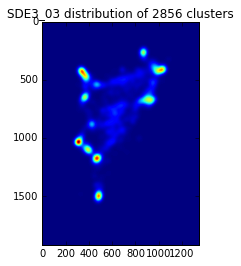

In [64]:
%matplotlib inline
#for plotting
import scipy.ndimage as ndi
import matplotlib.pyplot as plt
data = np.array( zip(SDE3_03['x'],SDE3_03['y']) )    ## create random dataset
print data.shape,"---dims---",data.ndim
img = np.zeros((1921,1345))                ## blank image
for i in xrange(data.shape[0]):          ## draw pixels
    img[int(data[i,0]), int(data[i,1])] += 1
img = ndi.gaussian_filter(img, (20,20))
print img.shape
fig,ax = plt.subplots()
plt.title('SDE3_03 distribution of %d clusters'% data.shape[0])
ax.imshow(img)
plt.show()